## Earthquakes in New Zeland (Depth distribution)
### Marta Braojos

We have some data from earthquakes in New Zeland, incuding the distinct depth in earth where they originated. We want to explore the distribution of this depths (data from [https://quakesearch.geonet.org.nz/](https://quakesearch.geonet.org.nz/))

In [26]:
import numpy as np
from matplotlib import pyplot as plt 

In [3]:
%%sh
ls

Earthquakes Depth.ipynb
earthquakes.csv
Permutation Testing with Monte Carlo.ipynb
Random Walk in a lattice.ipynb


In [4]:
%%sh  
# first three lines
head -3 earthquakes.csv

publicid,eventtype,origintime,modificationtime,longitude, latitude, magnitude, depth,magnitudetype,depthtype,evaluationmethod,evaluationstatus,evaluationmode,earthmodel,usedphasecount,usedstationcount,magnitudestationcount,minimumdistance,azimuthalgap,originerror,magnitudeuncertainty
2018p368955,,2018-05-17T12:19:35.516Z,2018-05-17T12:21:54.953Z,178.4653957,-37.51944533,2.209351541,20.9375,M,,NonLinLoc,,automatic,nz3drx,12,12,6,0.1363924727,261.0977462,0.8209633086,0
2018p368878,,2018-05-17T11:38:24.646Z,2018-05-17T11:40:26.254Z,177.8775115,-37.46115663,2.155154561,58.4375,M,,NonLinLoc,,automatic,nz3drx,11,11,7,0.3083220739,232.7487132,0.842884174,0


In [7]:
with open("earthquakes.csv") as f:   #To read the file and separate in line, in a List
    reader = f.read()
    
dataList = reader.split('\n')

In [8]:
len(dataList) #How many data we have

21018

In [10]:
dataList[0] #Headers; we are interested in depth (8th column)

'publicid,eventtype,origintime,modificationtime,longitude, latitude, magnitude, depth,magnitudetype,depthtype,evaluationmethod,evaluationstatus,evaluationmode,earthmodel,usedphasecount,usedstationcount,magnitudestationcount,minimumdistance,azimuthalgap,originerror,magnitudeuncertainty\r'

In [11]:
dataList[-1] 

''

In [13]:
dataList[-2] 

'2017p408120,earthquake,2017-06-01T00:07:04.890Z,2017-06-01T07:20:23.994Z,175.4930025,-39.31558765,1.298107247,13.5546875,M,,NonLinLoc,confirmed,manual,nz3drx,28,19,13,0.04550182409,86.69529793,0.2189521352,0\r'

In [14]:
dataList = dataList[:-1]

In [54]:
#Lets check what kind of events we have in the data
myDataAccumulatorType = []
for data in dataList[1:]:
    dataRow = data.split(',')
    myData = dataRow[1] #The depth
    myDataAccumulatorType.append(myData)
set(myDataAccumulatorType)  

{'',
 'earthquake',
 'explosion',
 'not locatable',
 'outside of network interest',
 'quarry blast'}

In [55]:
#We are just in earthquakes, so we will keep that 
myDataAccumulator = []
for data in dataList[1:]:
    dataRow = data.split(',')
    myData = float(dataRow[7]) #The depth
    if dataRow[1]=='earthquake':
        myDataAccumulator.append(myData)
depthData = np.array(myDataAccumulator)

In [56]:
depthData

array([   2.33742261,  152.0203705 ,   22.06038094, ...,   11.19184685,
          3.93726349,   13.5546875 ])

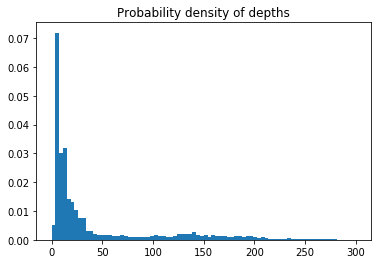

In [57]:
plt.hist(depthData, bins=80, range = (0,300), density=True) 
plt.title("Probability density of depths") 
plt.show()

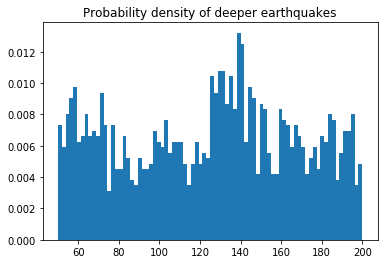

In [60]:
plt.hist(depthData, bins=80, range = (50,200), density=True) 
plt.title("Probability density of deeper earthquakes") 
plt.show()

It seems to be accumulated near surface 

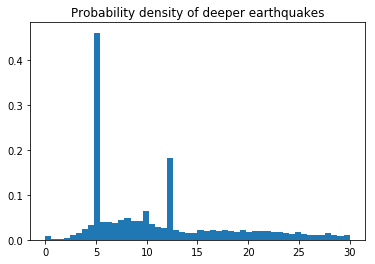

In [63]:
plt.hist(depthData, bins=50, range = (0,30), density=True) 
plt.title("Probability density of surface earthquakes") 
plt.show()

It seems that around 5 and 13, there are more earthquakes!

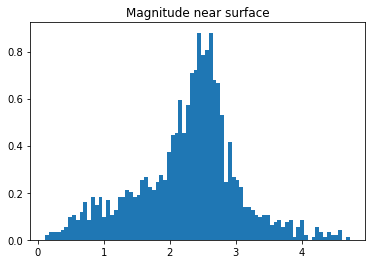

In [65]:
#We are just in earthquakes, so we will keep that 
myDataAccumulatorSurf = []
for data in dataList[1:]:
    dataRow = data.split(',')
    myData = float(dataRow[6]) #The magnitude
    if dataRow[1]=='earthquake' and  4 <float(dataRow[7])<6:
        myDataAccumulatorSurf.append(myData)
magDataSurf = np.array(myDataAccumulatorSurf)
plt.hist(magDataSurf, bins=80, density=True) 
plt.title("Magnitude near surface") 
plt.show()

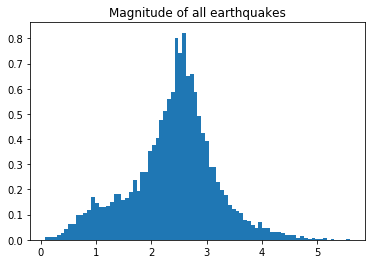

In [66]:
#We are just in earthquakes, so we will keep that 
myDataAccumulatorMag = []
for data in dataList[1:]:
    dataRow = data.split(',')
    myData = float(dataRow[6]) #The depth
    if dataRow[1]=='earthquake':
        myDataAccumulatorMag.append(myData)
magData = np.array(myDataAccumulatorMag)
plt.hist(magData, bins=80, density=True) 
plt.title("Magnitude of all earthquakes") 
plt.show()

It does not seem there is a big difference in magnitude between earthquakes near surface and in general